In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_excel('./upper_shuffled_output.xlsx')
CarPricesDataNumeric.head()

,Frequency,S11 Amplitude,S21 Amplitude,S11 Phase,S21 Phase,pH
0,5.5564,-1.27051,-17.34843,-174.67192,27.29303,8
1,4.6144,-1.54004,-18.17484,166.46060,-95.04148,8
2,4.2242,-1.24956,-18.76647,-170.61494,-33.92741,9
3,4.0310,-0.90798,-17.62688,-152.61465,-3.12845,9
4,5.9452,-0.66448,-23.24855,158.21119,-19.26053,9


In [2]:
# Separate Target Variable and Predictor Variables
# Frequency observation not needed for upper PH
TargetVariable=['pH']
Predictors=['S11 Amplitude', 'S21 Amplitude', , 'S11 Phase', 'S21 Phase']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28002, 2)
(28002, 1)
(12002, 2)
(12002, 1)


In [3]:
# # Separate Target Variable and Predictor Variables
# TargetVariable=['pH']
# Predictors=['Frequency', 'S11 Amplitude', 'S21 Amplitude', 'S11 Phase', 'S21 Phase']

# X=CarPricesDataNumeric[Predictors].values
# y=CarPricesDataNumeric[TargetVariable].values

# # Split the data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ### Sandardization of data ###
# from sklearn.preprocessing import StandardScaler
# PredictorScaler=StandardScaler()
# TargetVarScaler=StandardScaler()

# # Storing the fit object for later reference
# PredictorScalerFit=PredictorScaler.fit(X_train)
# TargetVarScalerFit=TargetVarScaler.fit(y_train)
# X_test = PredictorScalerFit.transform(X_test)
# y_test= TargetVarScalerFit.transform(y_test)

# # Generating the standardized values of X and y
# X=PredictorScalerFit.transform(X_train)
# y=TargetVarScalerFit.transform(y_train)



# # Quick sanity check with the shapes of Training and testing datasets
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [4]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.losses import Huber
from keras.losses import MeanAbsoluteError


# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal'))
# model.add(LeakyReLU(alpha=0.01))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
 
#Third layer
model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))

# Third layer
model.add(Dense(units=15, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))

#  #Fourth layer
# model.add(Dense(units=60, kernel_initializer='normal', activation='relu'))

# #Fifth layer
# model.add(Dense(units=40, kernel_initializer='normal' ))
# model.add(LeakyReLU(alpha=0.01))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

learning_rate = 0.001  # You can change this value to experiment with different learning rates

# Compile the model with custom learning rate
model.compile(loss=MeanAbsoluteError, optimizer=Adam(learning_rate=learning_rate))

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train ,batch_size = 35, epochs = 200, verbose=1)

2024-09-23 15:27:44.987739: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 15:27:44.988356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 15:27:44.990681: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 15:27:44.998131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 15:27:45.009698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Epoch 1/200


/home/sheesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-23 15:27:46.022391: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 0.8955
Epoch 2/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.8914
Epoch 3/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.8657
Epoch 4/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.8569
Epoch 5/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.8469
Epoch 6/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.8320
Epoch 7/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.8209
Epoch 8/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.8010
Epoch 9/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.7883
Epoch 10/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.7934
Epoch 11/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.8049
Epoch 12/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.7948
Epoch 13/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 0.7935
Epoch 14/200
801/801 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.8030
Epoch 15/200
801/801 ━━━━━━

KeyboardInterrupt: 

In [9]:
# from tensorflow.keras.models import load_model
# import numpy as np

# # Load the model from the .h5 file
# model = load_model('./model/ann_regressor_dami.h5')

In [10]:
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData

376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


,S11 Amplitude,S21 Amplitude,Price,PredictedPrice
0,-7.80551,-10.84536,10.0,7.974877
1,-3.47133,-13.97316,7.0,7.525799
2,-1.35306,-18.92296,10.0,8.210517
3,-1.01290,-18.95804,7.0,8.113905
4,-4.98960,-11.52883,8.0,8.060895
...,...,...,...,...
11997,-2.49970,-13.73611,7.0,8.671847
11998,-2.03941,-14.68973,9.0,8.297807
11999,-4.69072,-13.88813,7.0,8.833231
12000,-1.51510,-15.99372,7.0,8.208785


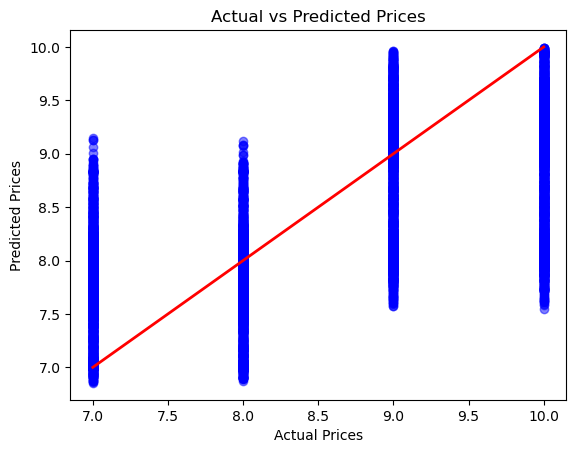

In [11]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted Prices
plt.scatter(TestingData['Price'], TestingData['PredictedPrice'], color='blue', alpha=0.5)

# Add a line representing perfect prediction (Actual = Predicted)
plt.plot([TestingData['Price'].min(), TestingData['Price'].max()], 
         [TestingData['Price'].min(), TestingData['Price'].max()], color='red', lw=2)

# Add title and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Show the plot
plt.show()
